In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
path = r'C:\Users\johan\Documents\Insta Basket Analysis'

In [3]:
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_merge_49.pkl'))

In [4]:
df.shape

(32404859, 34)

In [5]:
df.columns

Index(['order_id', 'user_id', 'eval_set', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', 'price_label', 'busiest_day', 'Busiest_days',
       'busiest_period_of_day.', 'max_order', 'loyalty_flag', 'mean_prices',
       'cust_frequent', 'spender_flag', 'freq_flag', 'first_name', 'sure_name',
       'gender', 'state', 'age', 'date_joined', 'dependant', 'status',
       'income', '_merge'],
      dtype='object')

# Final Wrangling

In [6]:
df[['order_id', 'user_id']].dtypes

order_id    int64
user_id     int64
dtype: object

In [7]:
# Changing ID to string so it is not read as statistical number
df['order_id'] = df['order_id'].astype('str')
df['user_id'] = df['user_id'].astype('str')

# Check the data type again
df[['order_id', 'user_id']].dtypes

order_id    object
user_id     object
dtype: object

In [8]:
# Drop kolom _merge
df.drop('_merge', axis=1, inplace=True, errors='ignore')

In [9]:
df.shape

(32404859, 33)

In [10]:
#2. Consider any security implications that might exist for this new data. You’ll need to address any PII data in the data before continuing your analysis.

In [11]:
df.columns

Index(['order_id', 'user_id', 'eval_set', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', 'price_label', 'busiest_day', 'Busiest_days',
       'busiest_period_of_day.', 'max_order', 'loyalty_flag', 'mean_prices',
       'cust_frequent', 'spender_flag', 'freq_flag', 'first_name', 'sure_name',
       'gender', 'state', 'age', 'date_joined', 'dependant', 'status',
       'income'],
      dtype='object')

In [12]:
# first name and last name able to has risk further i.e: correlate with his/her credit card information.

In [13]:
df.drop(columns = ['first_name', 'sure_name'], axis = 1, inplace = True)

In [14]:
df.columns

Index(['order_id', 'user_id', 'eval_set', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', 'price_label', 'busiest_day', 'Busiest_days',
       'busiest_period_of_day.', 'max_order', 'loyalty_flag', 'mean_prices',
       'cust_frequent', 'spender_flag', 'freq_flag', 'gender', 'state', 'age',
       'date_joined', 'dependant', 'status', 'income'],
      dtype='object')

In [15]:
df.shape

(32404859, 31)

# Department Table

In [16]:
# Before continue need to combine the department 

In [17]:
df_dept = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data','departments_wrangled.csv' ), index_col = False)

In [18]:
df_dept.head()

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [19]:
df_dept

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [20]:
df_dept.rename(columns = {'Unnamed: 0' : 'department_id'}, inplace = True)

In [21]:
df_dept.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [22]:
df_dept

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [23]:
df_dept

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [24]:
df_dept.columns

Index(['department_id', 'department'], dtype='object')

In [25]:
df.shape

(32404859, 31)

In [26]:
# Before merge
print(f"Number of columns before: {len(df.columns)}")

# Merge dataframes
df = df.merge(df_dept, on='department_id', how='left')

# After merge
print(f"Number of columns after: {len(df.columns)}")
print(f"New column added: 'department'")
print(df[['department_id', 'department']].head())


Number of columns before: 31
Number of columns after: 32
New column added: 'department'
   department_id  department
0              7   beverages
1             16  dairy eggs
2             19      snacks
3             19      snacks
4             17   household


In [27]:
df.shape

(32404859, 32)

In [28]:
df.columns

Index(['order_id', 'user_id', 'eval_set', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', 'price_label', 'busiest_day', 'Busiest_days',
       'busiest_period_of_day.', 'max_order', 'loyalty_flag', 'mean_prices',
       'cust_frequent', 'spender_flag', 'freq_flag', 'gender', 'state', 'age',
       'date_joined', 'dependant', 'status', 'income', 'department'],
      dtype='object')

In [29]:
# 3. The Instacart officers are interested in comparing customer behavior in different geographic areas. Create a regional segmentation of the data. You’ll need to create a “Region” column based on the “State” column from your customers data set.

In [30]:
# Create dictionary mapping the states to region based on : (https://simple.wikipedia.org/wiki/List_of_regions_of_the_United_States)

In [31]:
# Count how many times each state appears.
state_counts = df['state'].value_counts()
print("Number of occurrences of each state:")
print(state_counts)

Number of occurrences of each state:
state
Pennsylvania            667082
California              659783
Rhode Island            656913
Georgia                 656389
New Mexico              654494
Arizona                 653964
North Carolina          651900
Oklahoma                651739
Alaska                  648495
Minnesota               647825
Massachusetts           646358
Wyoming                 644255
Virginia                641421
Missouri                640732
Texas                   640394
Colorado                639280
Maine                   638583
North Dakota            638491
Alabama                 638003
Kansas                  637538
Louisiana               637482
Delaware                637024
South Carolina          636754
Oregon                  636425
Arkansas                636144
Nevada                  636139
New York                635983
Montana                 635265
South Dakota            633772
Illinois                633024
Hawaii                  632

In [32]:
#3A

In [33]:
# Creating a dictionary mapping the states to regions.
state_to_region = {
    # Northeast
    'Maine': 'Northeast', 'New Hampshire': 'Northeast', 'Vermont': 'Northeast', 'Massachusetts': 'Northeast', 
    'Rhode Island': 'Northeast', 'Connecticut': 'Northeast', 'New York': 'Northeast', 'Pennsylvania': 'Northeast', 'New Jersey': 'Northeast',
    
    # Midwest
    'Wisconsin': 'Midwest', 'Michigan': 'Midwest', 'Illinois': 'Midwest', 'Indiana': 'Midwest', 'Ohio': 'Midwest',
    'North Dakota': 'Midwest', 'South Dakota': 'Midwest', 'Nebraska': 'Midwest', 'Kansas': 'Midwest', 'Minnesota': 'Midwest', 
    'Iowa': 'Midwest', 'Missouri': 'Midwest',
    
    # South
    'Delaware': 'South', 'Maryland': 'South', 'District of Columbia': 'South', 'Virginia': 'South', 'West Virginia': 'South', 'North Carolina': 'South',
    'South Carolina': 'South', 'Georgia': 'South', 'Florida': 'South', 'Kentucky': 'South', 'Tennessee': 'South', 'Mississippi': 'South',
    'Alabama': 'South', 'Oklahoma': 'South', 'Texas': 'South', 'Arkansas': 'South', 'Louisiana': 'South',
    
    # West
    'Idaho': 'West', 'Montana': 'West', 'Wyoming': 'West', 'Nevada': 'West', 'Utah': 'West', 'Colorado': 'West', 'Arizona': 'West', 'New Mexico': 'West',
    'Alaska': 'West', 'Washington': 'West', 'Oregon': 'West', 'California': 'West', 'Hawaii': 'West'
}

In [34]:
# Add the new 'Region' column by mapping the 'state' column
df['Region'] = df['state'].map(state_to_region)

In [35]:
# Check 1: Confirm the column was added
print("A new column 'Region' has been added. The last column:")
print(df.columns.tolist()[-5:])  # Shows the last 5 columns

# Check 2: See a sample of the mapping
print("\nState -> Region mapping sample (first 10 lines):")
print(df[['state', 'Region']].head(10))

# Check 3: Analyze the regional distribution
print("\nCustomer Distribution per Region:")
print(df['Region'].value_counts())

# Check shape"
df.shape

A new column 'Region' has been added. The last column:
['dependant', 'status', 'income', 'department', 'Region']

State -> Region mapping sample (first 10 lines):
     state Region
0  Alabama  South
1  Alabama  South
2  Alabama  South
3  Alabama  South
4  Alabama  South
5  Alabama  South
6  Alabama  South
7  Alabama  South
8  Alabama  South
9  Alabama  South

Customer Distribution per Region:
Region
South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: count, dtype: int64


(32404859, 33)

In [36]:
# 3.B. Determine whether there’s a difference in spending habits between the different U.S. regions. (Hint: You can do this by crossing the variable you just created with the spending flag.)

In [37]:
df.columns

Index(['order_id', 'user_id', 'eval_set', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', 'price_label', 'busiest_day', 'Busiest_days',
       'busiest_period_of_day.', 'max_order', 'loyalty_flag', 'mean_prices',
       'cust_frequent', 'spender_flag', 'freq_flag', 'gender', 'state', 'age',
       'date_joined', 'dependant', 'status', 'income', 'department', 'Region'],
      dtype='object')

In [38]:
crosstab_regional_spending = pd.crosstab(df['Region'], df['spender_flag'], dropna = False)
print("Distribution of Expenditure Types (Spender Flag) per Region:")
print(crosstab_regional_spending)

Distribution of Expenditure Types (Spender Flag) per Region:
spender_flag  High spender  Low spender
Region                                 
Midwest             155975      7441350
Northeast           108225      5614511
South               209691     10582194
West                160354      8132559


In [39]:
# Counting the 'spender_flag'.

df['spender_flag'].value_counts(dropna = False)

spender_flag
Low spender     31770614
High spender      634245
Name: count, dtype: int64

In [40]:
# Based on the crosstab analysis between 'Region' and 'spender_flag', it can be concluded that there are no significant differences in spending habits among the four U.S. regions.

# Low Spender Dominance: In each region, the majority of orders (over $97.95%) come from customers classified as 'Low spenders'. This indicates that Instacart generally serves customers with a small average spend per order.

# Minimal Variation: The proportion of 'High spender' customers across all regions is very similar, ranging from $1.89% (Northeast) to $2.05% (Midwest). The largest percentage difference is only $0.16%, which is too small to be considered substantial enough to require drastically different regional marketing strategies.

# Business Implications: Instacart can continue to implement strategies to increase average order value (AOV) uniformly across the U.S., as no region exhibits significant spending anomalies that require specific focus at this time.


In [41]:
# Copying crosstab to clipboard to open in Excel

crosstab_regional_spending.to_clipboard()

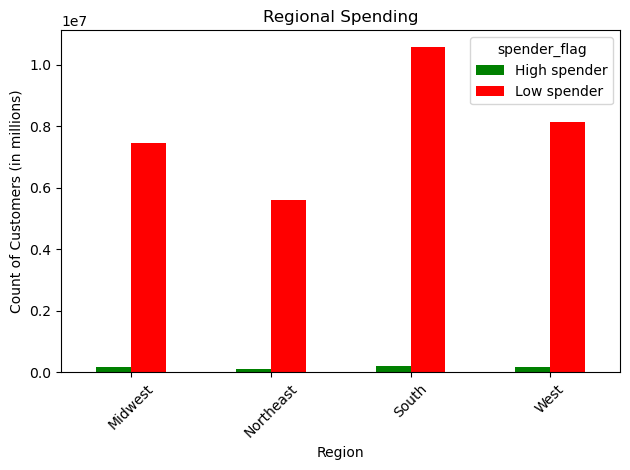

In [42]:
bar_reg_spending = crosstab_regional_spending.plot(kind="bar", color = ['green', 'red'] )

# Title 
plt.title ('Regional Spending')

# Rotating labels for better readability 
plt.xlabel ('Region')
plt.xticks(rotation=45)

# Y-axis label is in scientific notation (1e7 is actually 10 million) so it is showing raw counts. 
plt.ylabel ('Count of Customers (in millions)')

# Layout
plt.tight_layout()

In [43]:
bar_reg_spending.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_regional_spending.png'), bbox_inches='tight')

In [44]:
#4. The Instacart CFO isn’t interested in customers who don’t generate much revenue for the app. 
#   Create an exclusion flag for low-activity customers (customers with less than 5 orders) 
#   and exclude them from the data. Make sure you export this sample.

In [45]:
df.columns

Index(['order_id', 'user_id', 'eval_set', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', 'price_label', 'busiest_day', 'Busiest_days',
       'busiest_period_of_day.', 'max_order', 'loyalty_flag', 'mean_prices',
       'cust_frequent', 'spender_flag', 'freq_flag', 'gender', 'state', 'age',
       'date_joined', 'dependant', 'status', 'income', 'department', 'Region'],
      dtype='object')

In [44]:
df.shape

(32404859, 33)

In [45]:
# Create exclusion flag based on 'max_order' column
df.loc[df['max_order'] < 5, 'exclusion_flag'] = 'low activity'
df.loc[df['max_order'] >= 5, 'exclusion_flag'] = 'high activity'

# Checking the distribution of the newly created flag
df['exclusion_flag'].value_counts(dropna = False)

exclusion_flag
high activity    30964564
low activity      1440295
Name: count, dtype: int64

In [46]:
# Create a subset for low-activity customers
df_low_activity = df[df['exclusion_flag'] == 'low activity']

# Export low-activity customer data in pickle format
df_low_activity.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'low_activity_customers.pkl'))

In [47]:
# Create a new dataframe that contains ONLY high activity
df_active = df[df['exclusion_flag'] == 'high activity']

# Make sure that there is no longer any 'low activity' in this new dataframe.
print(df_active['exclusion_flag'].value_counts())

# Check the row and column dimensions
df_active.shape

exclusion_flag
high activity    30964564
Name: count, dtype: int64


(30964564, 34)

In [48]:
# Save df_active into the Prepared Data folder
df_active.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'active_customers.pkl'))

In [49]:
# 5. The marketing and business strategy units at Instacart want to create more-relevant marketing strategies for different products and are, thus, curious about customer profiling in their database. 
# Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents. 
# You might also use the “orders_day_of_week” and “order_hour_of_day” columns if you can think of a way they would impact customer profiles. (Hint: As an example, try thinking of what characteristics would lead you to the profile “Single adult” or “Young parent.”)

In [1]:
# Restart kernel
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
path = r'C:\Users\johan\Documents\Insta Basket Analysis'

In [3]:
df_active = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'active_customers.pkl'))

In [4]:
df_active.shape

(30964564, 34)

In [5]:
df_active.columns

Index(['order_id', 'user_id', 'eval_set', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', 'price_label', 'busiest_day', 'Busiest_days',
       'busiest_period_of_day.', 'max_order', 'loyalty_flag', 'mean_prices',
       'cust_frequent', 'spender_flag', 'freq_flag', 'gender', 'state', 'age',
       'date_joined', 'dependant', 'status', 'income', 'department', 'Region',
       'exclusion_flag'],
      dtype='object')

In [6]:
# Age

# 5.1 Create age category
df_active.loc[df_active['age'] <= 35, 'age_profile'] = 'Young Adult'
df_active.loc[(df_active['age'] > 35) & (df_active['age'] < 65), 'age_profile'] = 'Middle-Aged'
df_active.loc[df_active['age'] >= 65, 'age_profile'] = 'Senior'

# Verify the results
print("Age Profile Distribution:")
print(df_active['age_profile'].value_counts(dropna = False))

Age Profile Distribution:
age_profile
Middle-Aged    14030215
Young Adult     8738805
Senior          8195544
Name: count, dtype: int64


In [7]:
# Income

# 5.2 Creating Income Categories (New Version)
df_active.loc[df_active['income'] < 40000, 'income_profile'] = 'Low Income'
df_active.loc[(df_active['income'] >= 40000) & (df_active['income'] <= 120000), 'income_profile'] = 'Mid Income'
df_active.loc[df_active['income'] > 120000, 'income_profile'] = 'High Income'

# Verifikasi hasilnya
print("New Income Profile Distribution:")
print(df_active['income_profile'].value_counts(dropna = False))

New Income Profile Distribution:
income_profile
Mid Income     20173026
High Income     9179513
Low Income      1612025
Name: count, dtype: int64


In [8]:
# Status dan dependant

In [9]:
df_active['status'].describe()

count     30964564
unique           4
top        married
freq      21743711
Name: status, dtype: object

In [10]:
df_active['status'].value_counts(dropna=False)

status
married                             21743711
single                               5094410
divorced/widowed                     2645271
living with parents and siblings     1481172
Name: count, dtype: int64

In [11]:
df_active['dependant'].describe()

count    3.096456e+07
mean     1.501819e+00
std      1.118896e+00
min      0.000000e+00
25%      1.000000e+00
50%      2.000000e+00
75%      3.000000e+00
max      3.000000e+00
Name: dependant, dtype: float64

In [12]:
df_active['dependant'].value_counts(dropna=False)

dependant
3    7772516
0    7739681
2    7733261
1    7719106
Name: count, dtype: int64

In [13]:
df_active.columns

Index(['order_id', 'user_id', 'eval_set', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', 'price_label', 'busiest_day', 'Busiest_days',
       'busiest_period_of_day.', 'max_order', 'loyalty_flag', 'mean_prices',
       'cust_frequent', 'spender_flag', 'freq_flag', 'gender', 'state', 'age',
       'date_joined', 'dependant', 'status', 'income', 'department', 'Region',
       'exclusion_flag', 'age_profile', 'income_profile'],
      dtype='object')

In [14]:
# 5.3 Creating a Household Profile using .loc

# 1. Married - No Kids (If any in the data)
df_active.loc[(df_active['status'] == 'married') & (df_active['dependant'] == 0), 'household_profile'] = 'Married - No Kids'

# 2. Small Family (Married with 1-2 children)
df_active.loc[(df_active['status'] == 'married') & (df_active['dependant'] >= 1) & (df_active['dependant'] <= 2), 'household_profile'] = 'Small Family'

# 3. Large Family (Married with 3 children)
df_active.loc[(df_active['status'] == 'married') & (df_active['dependant'] >= 3), 'household_profile'] = 'Large Family'

# 4. Single Adult (Single/Divorced/Widowed without children)
df_active.loc[((df_active['status'] == 'single') | (df_active['status'] == 'divorced/widowed')) & (df_active['dependant'] == 0), 'household_profile'] = 'Single Adult'

# 5. Single Parent (Single/Divorced/Widowed with children)
df_active.loc[((df_active['status'] == 'single') | (df_active['status'] == 'divorced/widowed')) & (df_active['dependant'] >= 1), 'household_profile'] = 'Single Parent'

# 6. Young Adult Household (Living with parents and siblings)
df_active.loc[df_active['status'] == 'living with parents and siblings', 'household_profile'] = 'Young Adult Household'

# Fill in the rest that you may have accidentally missed
df_active['household_profile'] = df_active['household_profile'].fillna('Other')

# Verify results
print("Household Profile Distribution:")
print(df_active['household_profile'].value_counts(dropna = False))

Household Profile Distribution:
household_profile
Small Family             14459664
Single Adult              7739681
Large Family              7284047
Young Adult Household     1481172
Name: count, dtype: int64


In [15]:
df_active.shape

(30964564, 37)

In [16]:
df_active.columns

Index(['order_id', 'user_id', 'eval_set', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', 'price_label', 'busiest_day', 'Busiest_days',
       'busiest_period_of_day.', 'max_order', 'loyalty_flag', 'mean_prices',
       'cust_frequent', 'spender_flag', 'freq_flag', 'gender', 'state', 'age',
       'date_joined', 'dependant', 'status', 'income', 'department', 'Region',
       'exclusion_flag', 'age_profile', 'income_profile', 'household_profile'],
      dtype='object')

In [17]:
# Logical Explanation:
# Married - No Kids: From your value_counts data, this group will probably have a value of 0 or very little, because usually in the Instacart dataset, married status is always paired with a dependant > 0. But we still include it so that the logic is complete.

# Small vs Large Family: We differentiate families based on the number of children (1-2 vs 3).

# Single Parent: This is an important category. If a parent isn't married but has dependents, they fall into this category.

# Young Adult Household: This is specifically for those whose status is still living with parents and siblings.

In [18]:
# 6. Create an appropriate visualization to show the distribution of profiles.

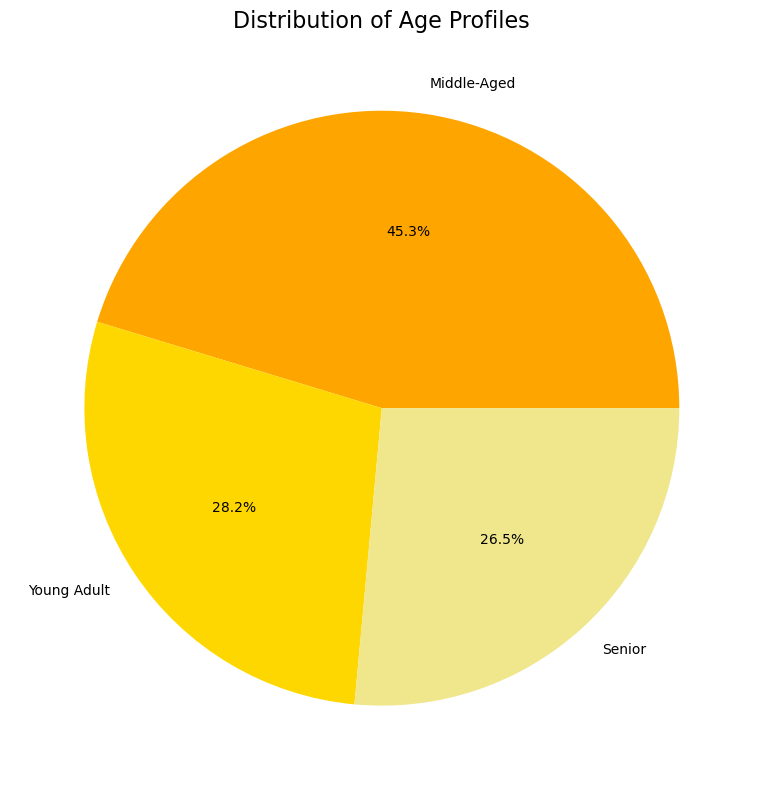

In [19]:
# 6.1 Creating a Pie Chart for Age Profile (Visualization Variations)
plt.figure(figsize=(8, 8))
age_pie = df_active['age_profile'].value_counts().plot.pie(autopct='%1.1f%%', colors=['orange', 'gold', 'khaki'])

plt.title('Distribution of Age Profiles', fontsize=16)
plt.ylabel('') #Removed the y label to make it cleaner

plt.tight_layout()
age_pie.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'age_profile_distribution.png'))

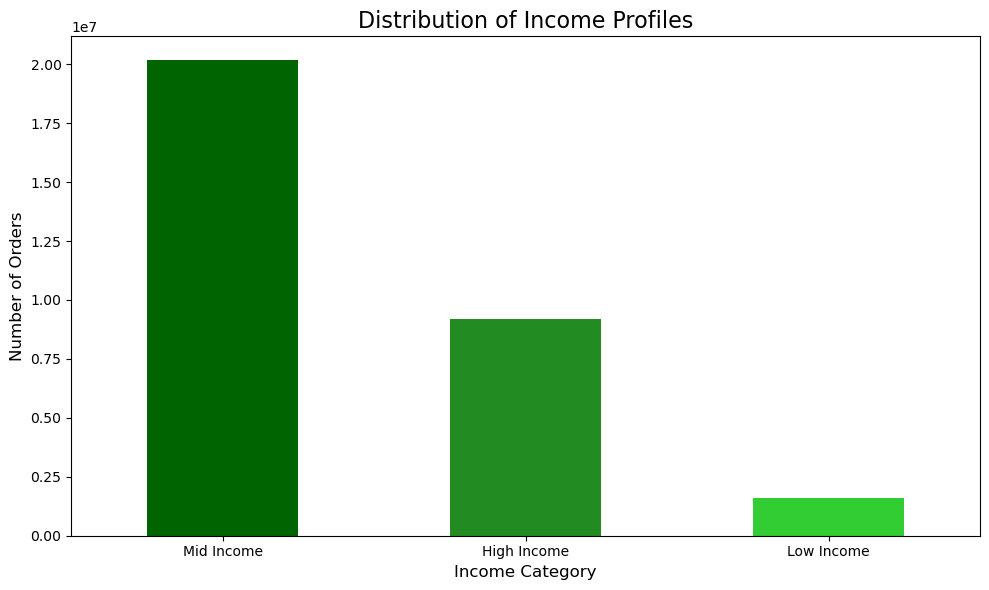

In [20]:
# 6.2 Creating a Bar Chart for an Income Profile
plt.figure(figsize=(10, 6))
income_bar = df_active['income_profile'].value_counts().plot.bar(color=['darkgreen', 'forestgreen', 'limegreen'])

plt.title('Distribution of Income Profiles', fontsize=16)
plt.xlabel('Income Category', fontsize=12)
plt.ylabel('Number of Orders', fontsize=12)
plt.xticks(rotation=0)

plt.tight_layout()
income_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'income_profile_distribution.png'))

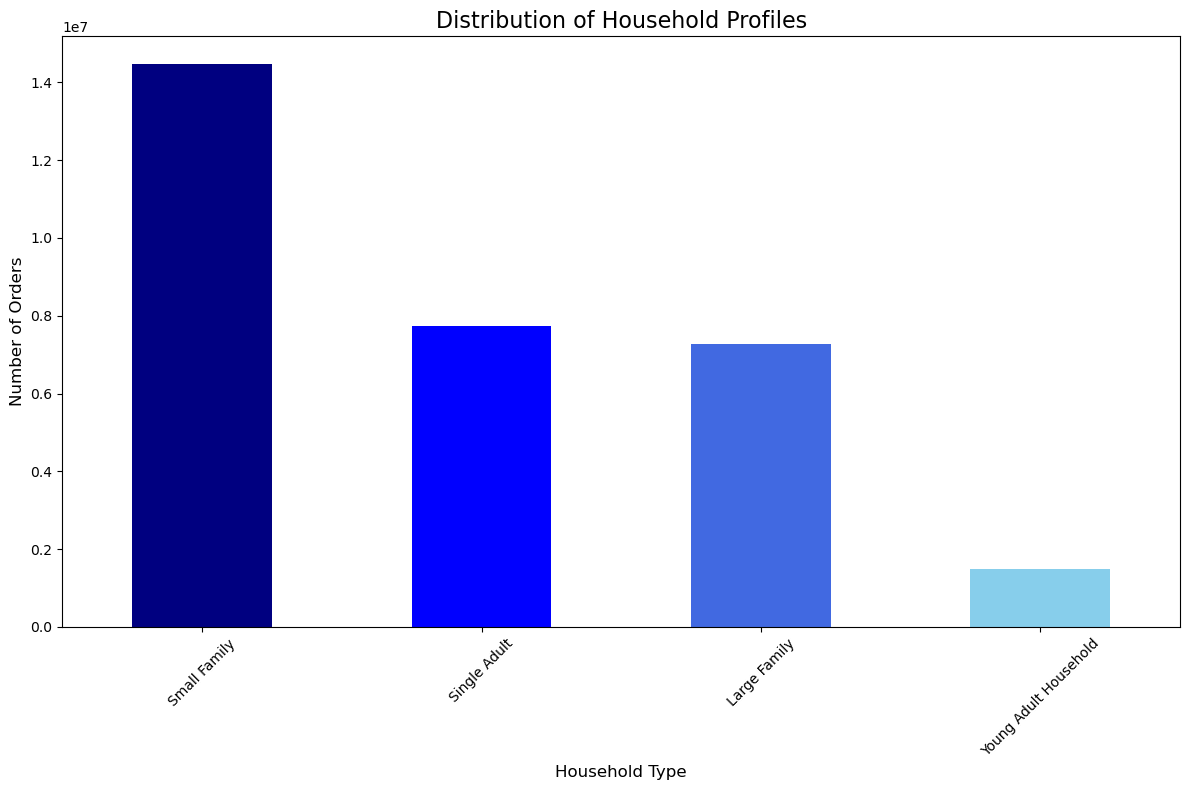

In [21]:
# 6.3 Creating a Bar Chart for a Household Profile
plt.figure(figsize=(12, 8))
household_bar = df_active['household_profile'].value_counts().plot.bar(color=['navy', 'blue', 'royalblue', 'skyblue', 'lightsteelblue', 'ghostwhite'])

plt.title('Distribution of Household Profiles', fontsize=16)
plt.xlabel('Household Type', fontsize=12)
plt.ylabel('Number of Orders', fontsize=12)
plt.xticks(rotation=45)

# Save the graph to the visualization folder
plt.tight_layout()
household_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'household_profile_distribution.png'))

In [22]:
# 7. Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.

In [23]:
# 7.1 Aggregation of Usage and Expenditure for Age Profiles
age_agg = df_active.groupby('age_profile').agg({
    'max_order': ['mean', 'min', 'max'],
    'prices': ['mean', 'min', 'max']
})

print("\nAge Profile Aggregation:")
print(age_agg)


Age Profile Aggregation:
             max_order             prices              
                  mean min max       mean  min      max
age_profile                                            
Middle-Aged  34.526453   5  99  11.942264  1.0  99999.0
Senior       34.326709   5  99  11.757768  1.0  99999.0
Young Adult  34.356734   5  99  12.084312  1.0  99999.0


In [24]:
# 7.2 Usage & Expenditure Aggregation for Income Profile
income_agg = df_active.groupby('income_profile').agg({
    'max_order': ['mean', 'min', 'max'],
    'prices': ['mean', 'min', 'max']
})

print("\nIncome Profile Aggregation:")
print(income_agg)


Income Profile Aggregation:
                max_order             prices              
                     mean min max       mean  min      max
income_profile                                            
High Income     34.623992   5  99  20.047256  1.0  99999.0
Low Income      32.032442   5  99   6.502895  1.0     25.0
Mid Income      34.526695   5  99   8.675416  1.0  99999.0


In [25]:
# 7.3 Usage & Expenditure Aggregation for Household Profile
household_agg = df_active.groupby('household_profile').agg({
    'max_order': ['mean', 'min', 'max'],
    'prices': ['mean', 'min', 'max']
})

print("Household Profile Aggregation:")
print(household_agg)

Household Profile Aggregation:
                       max_order             prices              
                            mean min max       mean  min      max
household_profile                                                
Large Family           34.337653   5  99  11.806000  1.0  99999.0
Single Adult           34.675839   5  99  12.102657  1.0  99999.0
Small Family           34.292360   5  99  12.014104  1.0  99999.0
Young Adult Household  34.853070   5  99  10.890167  1.0  99999.0


In [26]:
# Insight

# If the Mean Prices for High-Income Groups are significantly higher than for Low-Income Groups, 
# it means wealthy customers tend to purchase premium/organic products.

# If the Mean Maximum Order for Single Parents is higher, 
# it means they place orders more frequently (perhaps in small but frequent quantities) than Large Families.

In [27]:
# 8. Compare your customer profiles with regions and departments. 
# Can you identify a link between them? Customers may demonstrate different behaviors across regions, which could make this information important.

In [28]:
# 8.1 Crosstab between Household Profile and Region
profile_region_ct = pd.crosstab(df_active['household_profile'], df_active['Region'], dropna = False)

# Result
profile_region_ct

Region,Midwest,Northeast,South,West
household_profile,,,,
Large Family,1671542,1291928,2425559,1895018
Single Adult,1822816,1354482,2581933,1980450
Small Family,3415720,2561845,4798190,3683909
Young Adult Household,351435,256430,505457,367850


In [29]:
# 8.2 Crosstab between Household Profile and Department
profile_dept_ct = pd.crosstab(df_active['department'], df_active['household_profile'], dropna = False)

# Result
profile_dept_ct

household_profile,Large Family,Single Adult,Small Family,Young Adult Household
department,,,,
alcohol,34428,36827,64993,8379
babies,96971,103328,190712,19381
bakery,262021,281395,523728,53684
beverages,602237,645341,1205216,119107
breakfast,156765,166432,314455,33198
bulk,7734,8000,16084,1633
canned goods,238959,251020,473618,48477
dairy eggs,1212538,1294376,2420061,250207
deli,236512,253382,465821,48119


In [30]:
# Regional Link: Look at the "Large Family" row. Are the numbers in the "South" region significantly higher than other regions? 
# If so, suggest a large family advertising strategy specifically for the South region.

# Department Link: Look at the "Single Adult" column. Do they have high numbers in the "Alcohol" or "Snacks" departments? 
# If so, this is an important link for product promotion.

In [31]:
# 9. Produce suitable charts to illustrate your results and export them in your project folder.

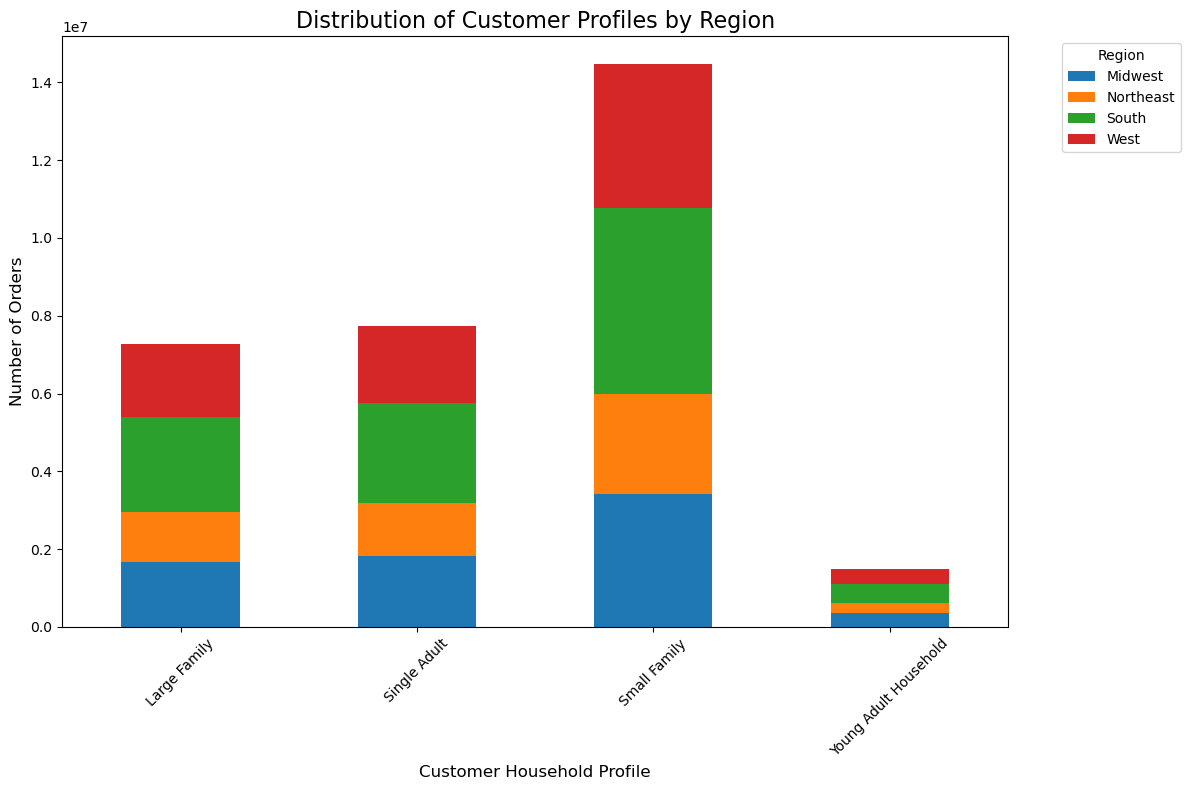

In [32]:
# Stacked Bar Chart for Profile vs Region
region_profile_bar = profile_region_ct.plot(kind='bar', stacked=True, figsize=(12, 8), 
                                          color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'])

plt.title('Distribution of Customer Profiles by Region', fontsize=16)
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel('Customer Household Profile', fontsize=12)
plt.ylabel('Number of Orders', fontsize=12)
plt.xticks(rotation=45)

# Menyimpan grafik
plt.tight_layout()
region_profile_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'profile_by_region_stacked.png'))

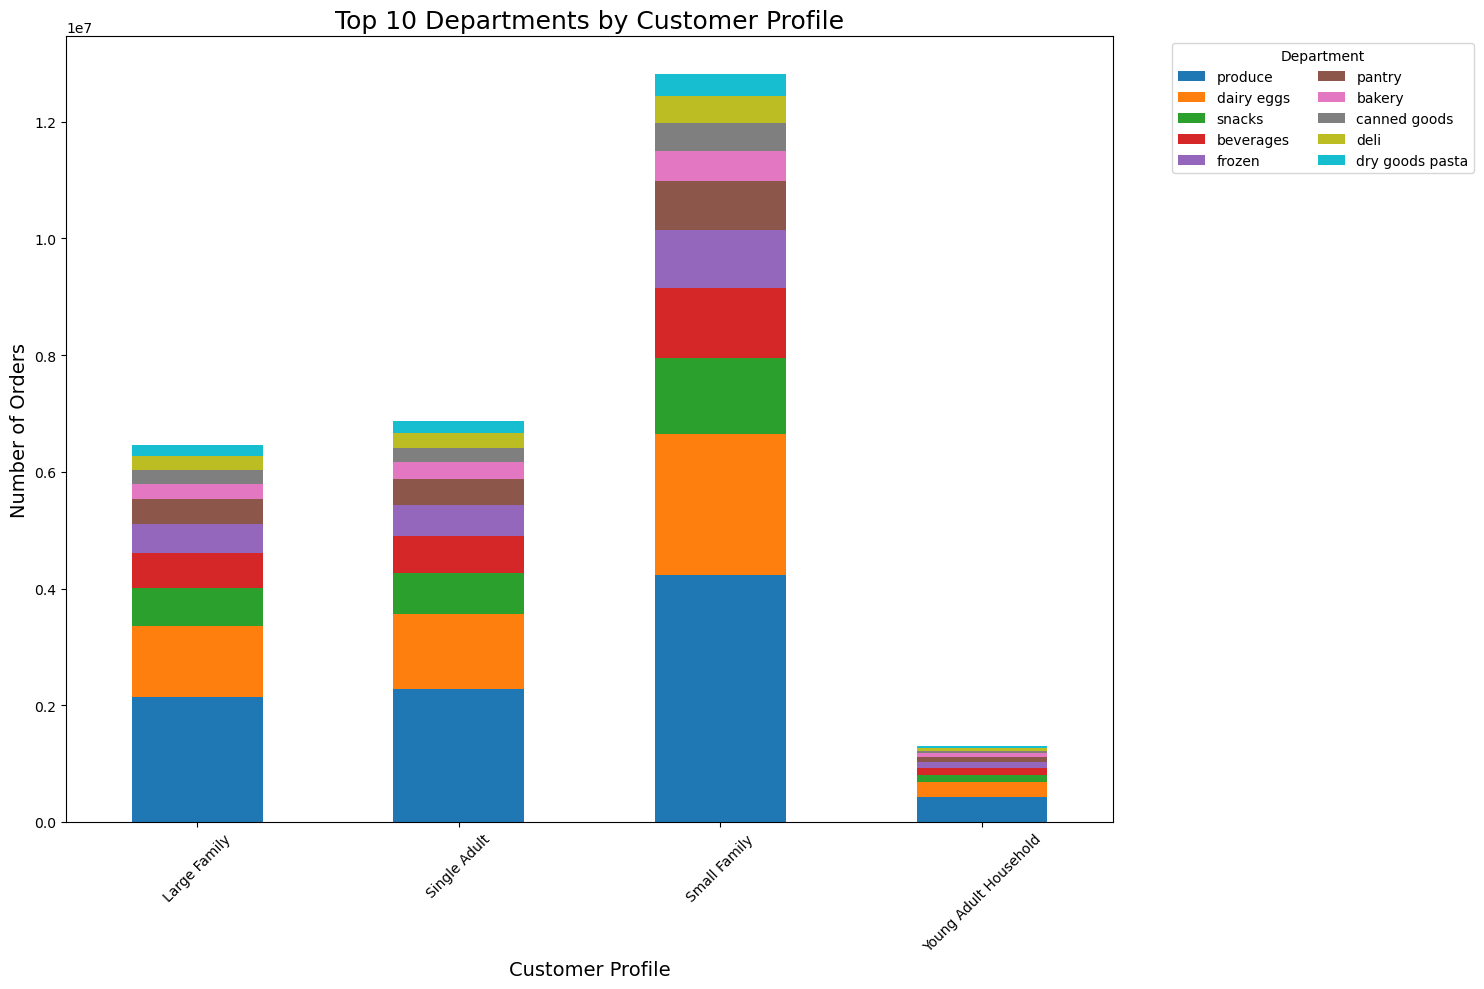

In [33]:
# Top 10 departemene to clean graphics
top_10_depts = profile_dept_ct.sum(axis=1).sort_values(ascending=False).head(10).index
profile_dept_top10 = profile_dept_ct.loc[top_10_depts]

# Stacked Bar Chart for Top 10 Departments
dept_profile_bar = profile_dept_top10.T.plot(kind='bar', stacked=True, figsize=(15, 10))

plt.title('Top 10 Departments by Customer Profile', fontsize=18)
plt.legend(title='Department', bbox_to_anchor=(1.05, 1), loc='upper left', ncol=2)
plt.xlabel('Customer Profile', fontsize=14)
plt.ylabel('Number of Orders', fontsize=14)
plt.xticks(rotation=45)

# Save the graph
plt.tight_layout()
dept_profile_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'top10_dept_by_profile_stacked.png'))